In [1]:
# pip install tensorflow
from PIL import Image
Image.MAX_IMAGE_PIXELS = None


In [3]:
import os
image_folder = 'astrodata'

class_counts = {}

for filename in os.listdir(image_folder):
    class_name = filename.split('_')[0]
    if class_name not in class_counts:
        class_counts[class_name] = 0
    class_counts[class_name] += 1

print(class_counts)

{'.ipynb': 1, 'galaxies': 240, 'nebulae': 234, 'solarsystem': 211}


In [4]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split

# Set higher limit for image size in PIL
Image.MAX_IMAGE_PIXELS = None

# Define the data directory
image_folder = 'astrodata'

# Parameters
img_height, img_width = 150, 150
batch_size = 32

# Prepare lists to hold file paths and labels
file_paths = []
labels = []

# Read filenames and extract class labels
for filename in os.listdir(image_folder):
    if filename.endswith(('jpg', 'png', 'jpeg')):  # Ensure only image files are processed
        class_name = filename.split('_')[0]
        file_paths.append(os.path.join(image_folder, filename))
        labels.append(class_name)

# Convert labels to numerical format
class_names = ['galaxies', 'nebulae', 'solarsystem']
label_map = {class_name: idx for idx, class_name in enumerate(class_names)}
labels = [label_map[label] for label in labels]

# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, stratify=labels)

# Function to resize images
def resize_image(img_path, target_size):
    img = Image.open(img_path)
    img = img.resize(target_size, Image.ANTIALIAS)
    return img

# Custom data generator
def data_generator(file_paths, labels, batch_size, img_height, img_width):
    num_samples = len(file_paths)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_paths = file_paths[offset:offset+batch_size]
            batch_labels = labels[offset:offset+batch_size]
            
            images = []
            for path in batch_paths:
                img = resize_image(path, (img_height, img_width))
                img = img_to_array(img)
                img /= 255.0
                images.append(img)
                
            yield np.array(images), np.array(batch_labels)

# Create training and validation generators
train_generator = data_generator(train_paths, train_labels, batch_size, img_height, img_width)
val_generator = data_generator(val_paths, val_labels, batch_size, img_height, img_width)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Calculate steps per epoch and validation steps
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(val_paths) // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=10
)


C:\Users\Rujuta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Rujuta\AppData\Local\Temp\ipykernel_3400\1123664353.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 264s 16s/step - accuracy: 0.4148 - loss: 1.4132 - val_accuracy: 0.5781 - val_loss: 0.8566
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 208s 13s/step - accuracy: 0.6442 - loss: 0.7724 - val_accuracy: 0.6857 - val_loss: 0.6396
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 188s 12s/step - accuracy: 0.7370 - loss: 0.6285 - val_accuracy: 0.6571 - val_loss: 0.9486
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 201s 12s/step - accuracy: 0.8408 - loss: 0.4583 - val_accuracy: 0.7714 - val_loss: 0.4879
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 220s 13s/step - accuracy: 0.8804 - loss: 0.3171 - val_accuracy: 0.7619 - val_loss: 0.6821
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 194s 12s/step - accuracy: 0.9321 - loss: 0.2287 - val_accuracy: 0.6484 - val_loss: 1.3832
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 197s 11s/step - accuracy: 0.9198 - loss: 0.2366 - val_accuracy: 0.7238 - val_loss: 0.8994
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 215s 13s/step - accuracy: 0.9162 - loss: 0.2392 - val_accuracy: 0.

In [7]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -------------------------------------- 275.7/275.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=04c49b27ab356890e5bd08b752e385f6c84445b4da5e56b18616dd75319da3c8
  Stored in directory: c:\users\rujuta\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


C:\Users\Rujuta\AppData\Local\Temp\ipykernel_3400\2568629240.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


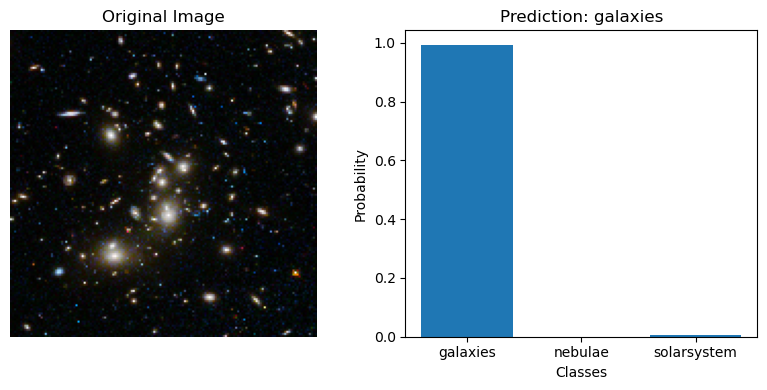

True Label: galaxies
Predicted Label: galaxies
Predicted Probabilities: [9.9335539e-01 1.8534443e-04 6.4593321e-03]


In [13]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Function to resize images
def resize_image(img_path, target_size):
    img = Image.open(img_path)
    img = img.resize(target_size, Image.ANTIALIAS)
    return img

# Function to load and preprocess image
def load_image(img_path, target_size):
    img = resize_image(img_path, target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

# Randomly select an image from the validation set
random_index = random.randint(0, len(val_paths) - 1)
img_path = val_paths[random_index]
true_label = val_labels[random_index]

# Load and preprocess the image
img = load_image(img_path, (img_height, img_width))

# Predict the class of the image
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class]

# Display the original image and the prediction result
plt.figure(figsize=(8, 4))

# Display the original image
plt.subplot(1, 2, 1)
original_img = load_img(img_path, target_size=(img_height, img_width))
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the prediction result
plt.subplot(1, 2, 2)
plt.bar(class_names, predictions[0])
plt.title(f'Prediction: {predicted_class_name}')
plt.xlabel('Classes')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

print(f'True Label: {class_names[true_label]}')
print(f'Predicted Label: {predicted_class_name}')
print(f'Predicted Probabilities: {predictions[0]}')


C:\Users\Rujuta\AppData\Local\Temp\ipykernel_3400\1299319724.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━

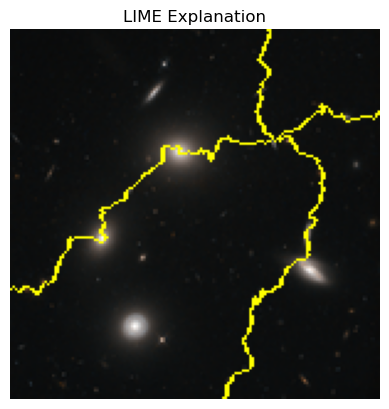

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image

# Function to resize images
def resize_image(img_path, target_size):
    img = Image.open(img_path)
    img = img.resize(target_size, Image.ANTIALIAS)
    return img

# Function to load and preprocess image
def load_image(img_path, target_size):
    img = resize_image(img_path, target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Function to get predictions
def predict(imgs):
    return model.predict(imgs)

# Randomly select an image from the validation set
random_index = random.randint(0, len(val_paths) - 1)
img_path = val_paths[random_index]

# Load and preprocess the image
img = load_image(img_path, (img_height, img_width))

# Generate LIME explanation
explanation = explainer.explain_instance(img[0], predict, top_labels=3, hide_color=0, num_samples=1000)

# Display the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


C:\Users\Rujuta\AppData\Local\Temp\ipykernel_3400\1123664353.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━

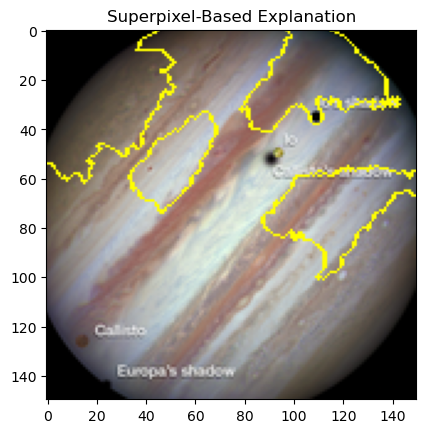

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Function to load and preprocess image
def load_image(img_path, target_size):
    img = resize_image(img_path, target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Function to get predictions
def predict(imgs):
    return model.predict(imgs)

# Load an image to explain
img_path = val_paths[0]  # Use an image from the validation set
img = load_image(img_path, (img_height, img_width))

# Generate LIME explanation
explanation = explainer.explain_instance(img[0], predict, top_labels=3, hide_color=0, num_samples=1000)

# Display the explanation for the top label
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title('Superpixel-Based Explanation')
plt.show()


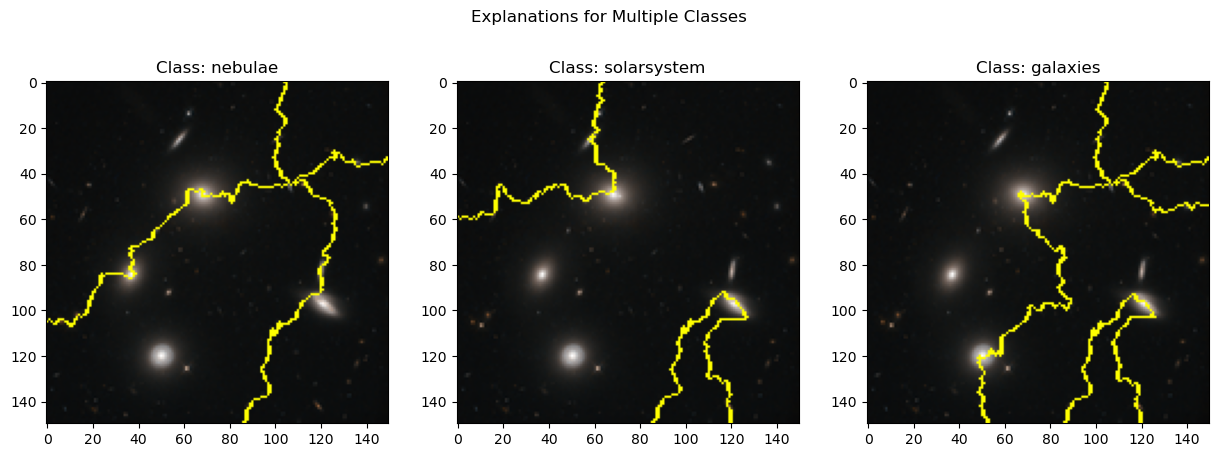

In [20]:
# Display explanations for the top 3 labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[i], positive_only=True, num_features=5, hide_rest=False)
    ax.imshow(mark_boundaries(temp, mask))
    ax.set_title(f'Class: {class_names[explanation.top_labels[i]]}')
plt.suptitle('Explanations for Multiple Classes')
plt.show()


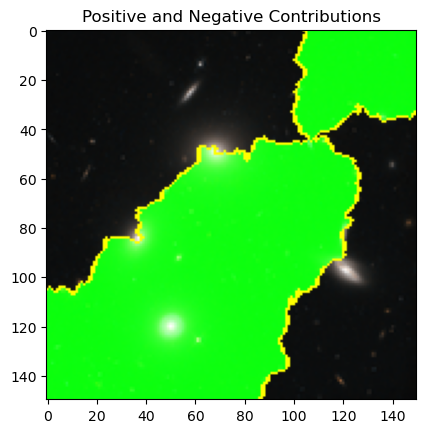

In [21]:
# Display positive and negative contributions for the top label
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title('Positive and Negative Contributions')
plt.show()


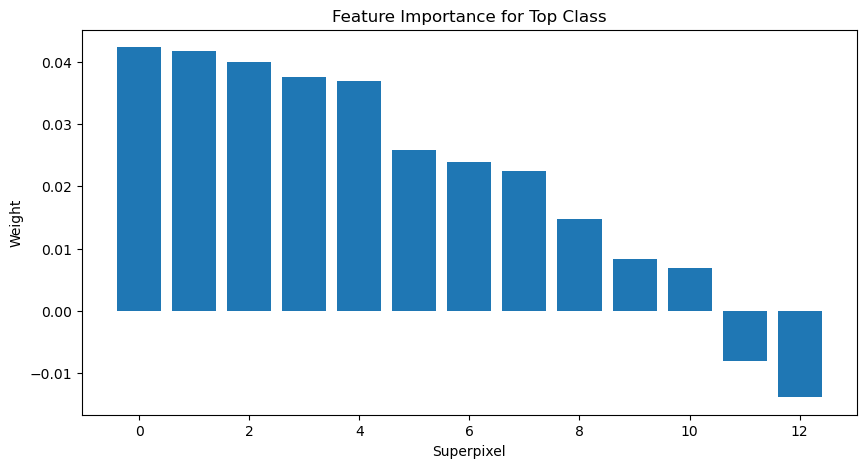

In [22]:
import pandas as pd

# Get the weights for the top label
weights = explanation.local_exp[explanation.top_labels[0]]
weights = sorted(weights, key=lambda x: x[1], reverse=True)

# Convert weights to a DataFrame
df_weights = pd.DataFrame(weights, columns=['Superpixel', 'Weight'])

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(df_weights)), df_weights['Weight'])
plt.xlabel('Superpixel')
plt.ylabel('Weight')
plt.title('Feature Importance for Top Class')
plt.show()
